**THE BALLISTIC PENDULUUM-A COMPUTATIONAL STUDY**
In questo paper è presentato uno studio computazionale per il pendolo balistico nel regime di collisioni lente


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m1 = 0.1
m2 = 0.75
V0 = 20
R = 0.3
vf = 2.353
g = 0

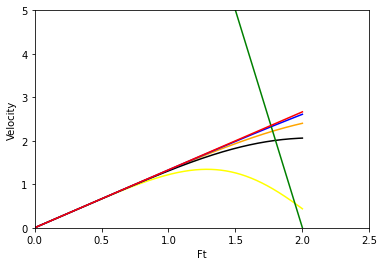

In [3]:


#Funzioni Lineari a e b
Ft = np.linspace(0, 2, 10000)

def V1x(x):
    return V0 - x/m1
V1x = V1x(Ft)

def v2(x):
    return x/m2
V2 = v2(Ft)


#Funzioni d e d'
def V2x(x, y):
    return y*np.cos(x)        #Continua dopo perchè mi servono teta e V2 dall'eq. diff


#Runge-Kutta per c e c'
def f(x,v,F) :
    return (((F*np.cos(x))/(m2+(m1*(np.sin(x))**2)))-((m1*(v**2)*(np.sin(x))**2)/(2*R*(m2+(m1*(np.sin(x)**2)))))-(((m1+m2)*g*np.sin(x))/(m2+(m1*(np.sin(x))**2))))

def f_2(x,csi,F):
    return f(x, R*F*csi, F)/((F**2)*R)

n = 10000
Ft_fin = 2
h = Ft_fin/n
x0 = 0
csi0 = 0
t0 = 0
F = 6
def RK4(F):
    t = t0
    x = x0
    csi = csi0
    T = np.zeros(n)
    X = np.zeros(n)
    V = np.zeros(n)
    for i in range (n):
        T[i] = t

        K1 = h*csi
        M1 = h*f_2(x,csi, F)

        K2 = h*(csi+M1/2)
        M2 = h*f_2(x+(K1/2), csi+(M1/2), F)

        K3 = h*(csi+(M2/2))
        M3 = h*f_2(x+(K2/2), csi+(M2/2), F)

        K4 = h*(csi+(M3/2))
        M4 = h*f_2(x+K3, csi+M3, F)

        x += (K1/6)+(K2/3)+(K3/3)+(K4/6)
        csi += (M1/6)+(M2/3)+(M3/3)+(M4/6)

        X[i] = x
        V[i] = R * F * csi

        t = t+h
        
    M = np.array((T, X, V))
    return M                  #M è una matrice con 3 righe ed n colonne. La prima riga è quella del tempo, la seconda riga è quella di teta e la terza riga è V (Tutto in funzione di Ft grazie alla trasformazione di coordinate)


#Possiamo scrivere d e d'
J = RK4(6)   #d'
V2x_6 = np.zeros(n)
for i in range(n):
    V2x_6[i] = V2x(J[1, i], J[2, i])

J = RK4(22)  #d
V2x_22 = np.zeros(n)
for i in range(n):
    V2x_22[i] = V2x(J[1, i], J[2, i])


#Plottiamo tutte e 6 le Curve
plt.plot(RK4(6)[0], V2x_6, color="yellow")            #d'
plt.plot(RK4(6)[0], V2x_22, color="orange")           #d

plt.plot(RK4(6)[0], RK4(6)[2], color="black")         #c'
plt.plot(RK4(22)[0], RK4(22)[2], color="blue")        #c

plt.plot(Ft, V1x, color="green")                      #a
plt.plot(Ft, V2, color="red")                         #b

plt.xlabel("Ft")
plt.ylabel("Velocity")
plt.xlim(0, 2.5)
plt.ylim(0, 5)
plt.show()

[1.8119812  1.7989799  1.78477848 1.77777778 1.77377738 1.77037704
 1.76877688 1.76757676 1.76677668]


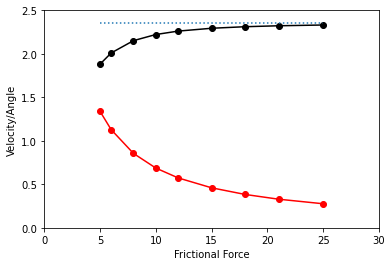

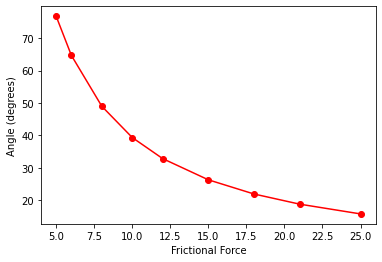

In [4]:
FF = np.array((5, 6, 8, 10, 12, 15, 18, 21, 25))

e = 0.00081
A = V1x[8000:9500]
B = Ft[8000:9500]
L = np.array((RK4(5)[0, 8000:9500], RK4(5)[2, 8000:9500], RK4(6)[0, 8000:9500], RK4(6)[2, 8000:9500], RK4(8)[0, 8000:9500], RK4(8)[2, 8000:9500], RK4(10)[0, 8000:9500], RK4(10)[2, 8000:9500], RK4(12)[0, 8000:9500], RK4(12)[2, 8000:9500], RK4(15)[0, 8000:9500], RK4(15)[2, 8000:9500], RK4(18)[0, 8000:9500], RK4(18)[2, 8000:9500], RK4(21)[0, 8000:9500], RK4(21)[2, 8000:9500], RK4(25)[0, 8000:9500], RK4(25)[2, 8000:9500]))
K = np.array((RK4(5)[0, 8000:9500], RK4(5)[1, 8000:9500], RK4(6)[0, 8000:9500], RK4(6)[1, 8000:9500], RK4(8)[0, 8000:9500], RK4(8)[1, 8000:9500], RK4(10)[0, 8000:9500], RK4(10)[1, 8000:9500], RK4(12)[0, 8000:9500], RK4(12)[1, 8000:9500], RK4(15)[0, 8000:9500], RK4(15)[1, 8000:9500], RK4(18)[0, 8000:9500], RK4(18)[1, 8000:9500], RK4(21)[0, 8000:9500], RK4(21)[1, 8000:9500], RK4(25)[0, 8000:9500], RK4(25)[1, 8000:9500]))
m = 1500
VF = np.zeros(9)
ThetaF = np.zeros(9)
TF = np.zeros(9)
for l in range(9):
    v_int = []
    theta_int = []
    for k in range(m):
        for i in range(m):
            if abs(B[i] - L[2*l, k]) <= e and abs(A[i] - L[2*l+1, k]) <= e:
                v_int = np.append(v_int, np.array((L[2*l+1, k])))
                theta_int = np.append(theta_int, np.array((K[2*l+1, k])))
                TF[l] = B[i]
                VF[l] = v_int[0]
                ThetaF[l] = theta_int[0]

C = np.ones(9)*2.36
print(TF)
plt.plot(FF, ThetaF, color="red", marker="o")
plt.plot(FF, VF, color="black", marker="o")
plt.plot(FF,C, linestyle=':')
plt.ylim(0, 2.5)
plt.xlim(0, 30)
plt.xlabel("Frictional Force")
plt.ylabel("Velocity/Angle")
plt.show()
plt.plot(FF, ThetaF*57.2958, color="red", marker="o")
plt.xlabel("Frictional Force")
plt.ylabel("Angle (degrees)")
plt.show()

Ora andiamo a fare il grafico degli angoli in funzione del tempo, tenendo conto del fatto che dopo il tempo di collisione il sistema si muove come un pendolo normale.

In [5]:
def f_3(x,eta,F):
    return f(x, R*eta, F)/R

n = 10000
tfin = 0.45
h_1 = tfin/n
x0 = 0
eta0 = 0
t0 = 0
F = 6
def RK4bis(F):
    t = t0
    x = x0
    eta = eta0
    TEMPI = np.zeros(n)
    ANGOLI = np.zeros(n)
    VELOCITA = np.zeros(n)
    for i in range (n):
        TEMPI[i] = t

        K1 = h_1*eta
        M1 = h_1*f_3(x, eta, F)

        K2 = h_1*(eta+M1/2)
        M2 = h_1*f_3(x+(K1/2), eta+(M1/2), F)

        K3 = h_1*(eta+(M2/2))
        M3 = h_1*f_3(x+(K2/2), eta+(M2/2), F)

        K4 = h_1*(eta+(M3/2))
        M4 = h_1*f_3(x+K3, eta+M3, F)

        x += (K1/6)+(K2/3)+(K3/3)+(K4/6)
        eta += (M1/6)+(M2/3)+(M3/3)+(M4/6)

        ANGOLI[i] = x
        VELOCITA[i] = eta*R

        t = t+h_1
        
    MBIS = np.array((TEMPI, ANGOLI, VELOCITA))
    return MBIS                 #M è una matrice con 3 righe ed n colonne. La prima riga è quella del tempo, la seconda riga è quella di teta e la terza riga è V (Tutto in funzione di Ft grazie alla trasformazione di coordinate)


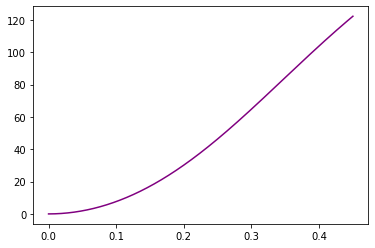

In [6]:
J = RK4bis(6)
plt.plot(RK4bis(6)[0], RK4bis(6)[1]*57.2958, color="purple")

In [7]:
omega0 = (V0/R)*(m1/(m1+m2))
alpha0=0
tempo0=0
G=9.81

def seno(alpha):
    return (-(G/R)*np.sin(alpha))

def alpha_func():
    alpha = alpha0
    omega = omega0
    tempo=tempo0
    TT = np.zeros(n)
    AL = np.zeros(n)
    OM = np.zeros(n)
    for i in range (n):
        TT[i] = tempo

        K1 = h_1*omega
        M1 = h_1*seno(alpha)
        
        K2 = h_1*(omega+M1/2)
        M2 = h_1*seno(alpha+(K1/2))

        K3 = h_1*(omega+M2/2)
        M3 = h_1*seno(alpha+(K2/2))
        
        K4 = h_1*(omega+M3/2)
        M4 = h_1*seno(alpha+K3)

        alpha += (K1/6)+(K2/3)+(K3/3)+(K4/6)
        omega += (M1/6)+(M2/3)+(M3/3)+(M4/6)

        AL[i] = alpha
        OM[i] = omega

        tempo = tempo+h_1
        
    MALPHA = np.array((TT, AL, OM))
    return MALPHA           

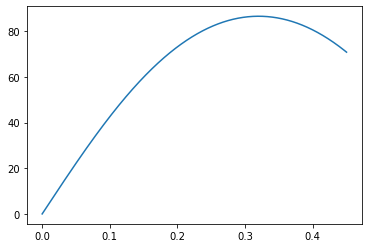

In [8]:
alpha_func()
plt.plot(alpha_func()[0], alpha_func()[1]*57.2958)

In [9]:
#abbiamo i tempi di collisione per più forze 
Z = np.zeros(9)
for i in range (9):
    Z[i]=TF[i]/FF[i]
    
print(Z)

[0.36239624 0.29982998 0.22309731 0.17777778 0.14781478 0.11802514
 0.09826538 0.08417032 0.07067107]


In [18]:
TIME= np.zeros(100)
ANGLE = np.zeros(100)
time0=0
angle0=0

def funzionebella():
    time=time0
    angle=angle0
    
    for j in range (100):
        TIME[j]=time
        ANGLE[j]=angle
        if j<0.29982998:
            angle=RK4bis(6)[1,j]
        else :
            angle=alpha_func()[1,j]
                
        time=time+h_1
    MATRICE = np.array((TIME, ANGLE))        
    return MATRICE
            

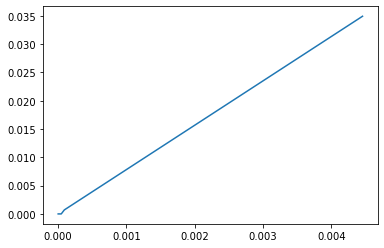

In [19]:
funzionebella()
plt.plot(funzionebella()[0], funzionebella()[1])